## **Name: Mahmoud Farid Mohamed**
## **The Sparks fundation Data Dcience internship #GRIPMAY22**

# **Task #1**
### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
#loading data
data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
print(data.shape)
data.head()

Data imported successfully
(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<function matplotlib.pyplot.show(close=None, block=None)>

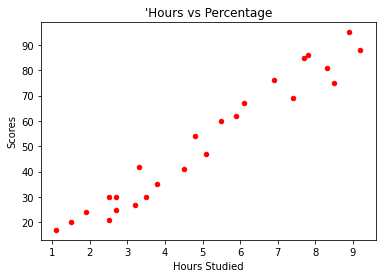

In [3]:
# Plotting the distribution of scores
data.plot(kind="scatter", x = 'Hours', y = 'Scores', color = 'red', style = 'o')
plt.title("'Hours vs Percentage")
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show

### **Preparing the data**

The next step is to divide the data into "features" (inputs) and "labels" (outputs).

In [4]:
features = data.iloc[:, :-1].values  
labels = data.iloc[:, 1].values

In [5]:
#split this data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state=42, test_size=0.25)

In [6]:
#Preparing the data
x_train = np.array(x_train).reshape(x_train.shape[0], 1)
x_test = np.array(x_test).reshape(x_test.shape[0], 1)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_train.shape

(18, 1)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm

In [7]:
model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test) # Predicting the scores

<function matplotlib.pyplot.show(close=None, block=None)>

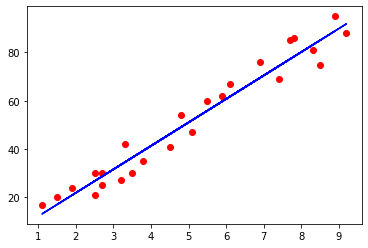

In [8]:
# Plotting the regression line
predict = model.coef_ * data['Hours'] + model.intercept_

# Plotting for the test data
plt.scatter(data['Hours'], data['Scores'], color='red')
plt.plot(data['Hours'], predict, color='blue')
plt.show

In [9]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})  
df 

,Actual,Predicted
0,81,83.107332
1,30,26.765598
2,21,26.765598
3,76,69.507603
4,62,59.793511
5,25,28.708416
6,42,34.536871


### **Wat will be predicted score if a student studies for 9.25hr/day?**

In [10]:
#Testing the model
study_hours = np.array(9.25).reshape(-1, 1)
score = model.predict(study_hours)
print("Study hours = ", study_hours[0, 0])
print("Predicted score = ", score[0])

Study hours =  9.25
Predicted score =  92.33571987331146


### **Evaluating the model**

The final step is to evaluate the performance of algorithm.

In [11]:
#model accurcy
accurcy = model.score(x_test, y_test)
print("Model accurcy = %", accurcy*100)

Model accurcy = % 95.53509219739938


In [12]:
#print Mean squared error and Mean absolute error
print("Mean squared error = ", mean_squared_error(y_predict, y_test))
print("Mean absolute error = ", mean_absolute_error(y_predict, y_test))

Mean squared error =  23.51639603459522
Mean absolute error =  4.425394675156182
